# FIFS Sports Big Data Gamethon 2025  

## **Resources**  
Here are key data sources for the competition:  
- **Cricinfo Stats Repository:** [ESPN Cricinfo Stats](https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;type=batting)  
- **Cricsheet:** [Cricsheet.org](https://cricsheet.org/)  

---

## **Overview**  
The **FIFS Sports Big Data Gamethon 2025** is an AI/ML-powered competition that challenges participants to develop predictive models for **fantasy cricket team selection** during the **ICC Champions Trophy 2025** (Feb 19 - Mar 9, 2025). The goal is to maximize **fantasy points** across all matches by selecting optimal teams based on historical performance, match conditions, and real-time constraints.  

---

## **Objectives of this Notebook**  
This notebook serves as an **introduction to the competition**, outlining the **rules, constraints, and evaluation criteria**. It also lays the foundation for data collection, feature engineering, and model development.  

### **Key Goals**  
- Understand the **gameplay rules** for team selection, budget constraints, and scoring system.  
- Identify the **factors influencing player selection**, such as form, venue, and match conditions.  
- Outline the strategy for **building an AI/ML model** to optimize fantasy team selection.  

---

## **Gameplay Rules & Constraints**  

<details>
  <summary>Team Composition (Click to expand)</summary>  

- A fantasy team consists of **11 players**, matching real-life teams.  
- Each team must include **at least 1 player from both competing teams** in a match.  
- The team must have **at least one player from each category**:  
  - **Wicketkeepers (WK)**  
  - **Batters (BAT)**  
  - **All-rounders (AR)**  
  - **Bowlers (BOWL)**  

</details>  

<details>
  <summary>Budget & Player Credits (Click to expand) </summary>  

- Every player is assigned a **credit value** based on their performance and demand.  
- Participants are given a **budget of 100 player credits** to select their **11 players**.  

</details>  

<details>
  <summary>Backups & Player Replacements (Click to expand) </summary>  

- Participants can select **up to 4 backup players** in case a selected player is not in the final playing XI.  
- Backup players will **only replace non-announced players** and must satisfy all **team composition rules**.  
- ⚠️ Example: If you only select **one bowler** and they are dropped from the playing XI, but none of your backups are bowlers, then the team selection will be invalid.  

</details>  

<details>
  <summary>Fantasy Points System (Click to expand) </summary>  

- Players earn points based on their **match performance** (batting, bowling, fielding).  
- The **official scoring system** for the ICC Champions Trophy can be found **[here](https://www.dream11.com/games/fantasy-cricket/how-to-play?ln=en-US)** under the **One Day (OD) tab**.  

</details>  

---

## **📊 Data Provided**  

<details>
  <summary>Data Sources & Availability (Click to expand) </summary>  

1. **Cricinfo Stats Repository** → [Link](https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;type=batting)  
2. **Cricsheet** → [Link](https://cricsheet.org/) 

</details>  

---

## **Expected Outcomes**  
By the end of this project, we aim to:  
**Understand the constraints and optimize team selection strategies.**  
**Analyze historical data to extract meaningful player performance trends.**  
**Develop an AI/ML-based model to predict and select the best teams dynamically.**  
**Ensure compliance with fantasy cricket rules while maximizing points.**  

This introduction sets the foundation for our data-driven approach to **fantasy cricket optimization**.

In [1]:
import os
import json
import pandas as pd
import numpy as np

In [2]:
json_folder = './odis_json/'
csv_folder = './odi_csv/'
output_folder = './output/'

In [3]:
df = pd.read_csv(os.path.join(output_folder, "match_summary.csv"))

In [4]:
df.head()

,match_id,created,city,dates,event_name,match_number,gender,match_type,match_type_number,toss_winner,...,outcome_winner,outcome_by_runs,outcome_by_wickets,overs,player_of_match,season,teams,venue,total_fours,total_sixes
0,1387601,2023-12-19,Gqeberha,2023-12-19,India tour of South Africa,2.0,male,ODI,4714,South Africa,...,South Africa,NaN,8.0,50,T de Zorzi,2023/24,"India, South Africa","St George's Park, Gqeberha",41,10
1,467883,2010-11-29,Guwahati,2010-11-28,New Zealand in India ODI Series,1.0,male,ODI,3070,New Zealand,...,India,40.0,NaN,50,V Kohli,2010/11,"India, New Zealand",Nehru Stadium,53,6
2,351689,2013-03-04,Perth,2009-02-01,Chappell-Hadlee Trophy,1.0,male,ODI,2811,Australia,...,New Zealand,NaN,2.0,50,KD Mills,2008/09,"Australia, New Zealand",Western Australia Cricket Association Ground,25,4
3,1253268,2021-03-10,Lucknow,2021-03-09,South Africa Women tour of India,2.0,female,ODI,1191,India,...,India,NaN,9.0,50,J Goswami,2020/21,"South Africa, India",Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,34,3
4,1312806,2022-06-12,Pearland,2022-06-11,ICC Men's Cricket World Cup League 2,87.0,male,ODI,4406,Nepal,...,NaN,NaN,NaN,50,SR Taylor,2022,"Nepal, United States of America","Moosa Cricket Stadium, Pearland",35,9


In [5]:
df.loc[:, 'created'] = pd.to_datetime(df['created'])

In [6]:
df.head()

,match_id,created,city,dates,event_name,match_number,gender,match_type,match_type_number,toss_winner,...,outcome_winner,outcome_by_runs,outcome_by_wickets,overs,player_of_match,season,teams,venue,total_fours,total_sixes
0,1387601,2023-12-19 00:00:00,Gqeberha,2023-12-19,India tour of South Africa,2.0,male,ODI,4714,South Africa,...,South Africa,NaN,8.0,50,T de Zorzi,2023/24,"India, South Africa","St George's Park, Gqeberha",41,10
1,467883,2010-11-29 00:00:00,Guwahati,2010-11-28,New Zealand in India ODI Series,1.0,male,ODI,3070,New Zealand,...,India,40.0,NaN,50,V Kohli,2010/11,"India, New Zealand",Nehru Stadium,53,6
2,351689,2013-03-04 00:00:00,Perth,2009-02-01,Chappell-Hadlee Trophy,1.0,male,ODI,2811,Australia,...,New Zealand,NaN,2.0,50,KD Mills,2008/09,"Australia, New Zealand",Western Australia Cricket Association Ground,25,4
3,1253268,2021-03-10 00:00:00,Lucknow,2021-03-09,South Africa Women tour of India,2.0,female,ODI,1191,India,...,India,NaN,9.0,50,J Goswami,2020/21,"South Africa, India",Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,34,3
4,1312806,2022-06-12 00:00:00,Pearland,2022-06-11,ICC Men's Cricket World Cup League 2,87.0,male,ODI,4406,Nepal,...,NaN,NaN,NaN,50,SR Taylor,2022,"Nepal, United States of America","Moosa Cricket Stadium, Pearland",35,9


In [7]:
df.size

60627

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2887 entries, 0 to 2886
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   match_id            2887 non-null   int64  
 1   created             2887 non-null   object 
 2   city                2581 non-null   object 
 3   dates               2887 non-null   object 
 4   event_name          2873 non-null   object 
 5   match_number        2684 non-null   float64
 6   gender              2887 non-null   object 
 7   match_type          2887 non-null   object 
 8   match_type_number   2887 non-null   int64  
 9   toss_winner         2887 non-null   object 
 10  toss_decision       2887 non-null   object 
 11  outcome_winner      2744 non-null   object 
 12  outcome_by_runs     1333 non-null   float64
 13  outcome_by_wickets  1411 non-null   float64
 14  overs               2887 non-null   int64  
 15  player_of_match     2677 non-null   object 
 16  season

# Player stats

| **Feature**                            | **Description**                                                  |
| -------------------------------------- | ---------------------------------------------------------------- |
| **Player Name**                        | Name of the player                                               |
| **Match ID**                           | Unique match identifier                                          |
| **Team**                               | Team of the player                                               |
| **Runs Scored (`runs`)**               | Total runs scored by the player                                  |
| **Balls Faced (`balls_faced`)**        | Number of balls faced by the player                              |
| **Fours (`fours`)**                    | Number of fours hit by the player                                |
| **Sixes (`sixes`)**                    | Number of sixes hit by the player                                |
| **Strike Rate (`strike_rate`)**        | Batting strike rate (calculated)                                 |
| **Wickets Taken (`wickets`)**          | Number of wickets taken by the bowler                            |
| **Maiden Over (`maiden`)**             | Number of overs in which no runs are scored                      |
| **Overs Bowled (`overs_bowled`)**      | Number of overs bowled by the player                             |
| **Balls Bowled (`balls_bowled`)**      | Total balls bowled by the player                                 |
| **Runs Conceded (`runs_conceded`)**    | Runs conceded by the bowler                                      |
| **Economy Rate (`economy`)**           | Bowling economy rate (calculated)                                |
| **Catches (`catches`)**                | Number of catches taken by the player                            |
| **Run Outs (`run_outs`)**              | Number of run outs contributed by the player (if available)      |
| **Match Outcome (`match_outcome`)**    | Whether the player’s team won or lost (win/loss)                 |
| **Player Role (Captain/Vice-Captain)** | Whether the player is a captain, vice-captain, or regular player |


In [9]:
players_detailed_stats = pd.read_csv(os.path.join(output_folder, 'detailed_player_data.csv'))

In [10]:
# players_detailed_stats.head(50)
players_detailed_stats.head()

,match_id,player,team,runs,balls_faced,fours,sixes,wickets,overs_bowled,balls_bowled,...,strike_rate_30_39,strike_rate_below_30,economy_below_2.5,economy_2.5_3.49,economy_3.5_4.5,economy_7_8,economy_8.01_9,economy_above_9,fantasy_points,venue
0,792295,RG Sharma,India,264,176,33,9,0,0,0,...,0,0,0,0,0,0,0,0,540,Eden Gardens
1,656427,CH Gayle,West Indies,215,151,10,16,2,6,38,...,0,0,0,0,0,0,0,0,511,Manuka Oval
2,656489,MJ Guptill,New Zealand,237,166,24,11,0,0,0,...,0,0,0,0,0,0,0,0,505,Westpac Stadium
3,503364,SR Watson,Australia,185,97,15,15,1,7,42,...,0,0,0,0,0,0,0,0,480,Shere Bangla National Stadium
4,1340847,Ishan Kishan,India,210,133,24,10,0,0,0,...,0,0,0,0,0,0,0,0,456,"Zahur Ahmed Chowdhury Stadium, Chattogram"


In [11]:
players_detailed_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52031 entries, 0 to 52030
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   match_id               52031 non-null  int64  
 1   player                 52031 non-null  object 
 2   team                   52031 non-null  object 
 3   runs                   52031 non-null  int64  
 4   balls_faced            52031 non-null  int64  
 5   fours                  52031 non-null  int64  
 6   sixes                  52031 non-null  int64  
 7   wickets                52031 non-null  int64  
 8   overs_bowled           52031 non-null  int64  
 9   balls_bowled           52031 non-null  int64  
 10  runs_conceded          52031 non-null  int64  
 11  catches                52031 non-null  int64  
 12  run_outs               52031 non-null  int64  
 13  maiden                 52031 non-null  int64  
 14  stumps                 52031 non-null  int64  
 15  ma

In [12]:
players_detailed_stats.shape

(52031, 32)

In [13]:
def getplayersformatch(matchid, team):
    return players_detailed_stats[(players_detailed_stats["match_id"] == matchid) & (players_detailed_stats["team"] == team)]

In [14]:
getplayersformatch("64814", "New Zealand")

,match_id,player,team,runs,balls_faced,fours,sixes,wickets,overs_bowled,balls_bowled,...,strike_rate_30_39,strike_rate_below_30,economy_below_2.5,economy_2.5_3.49,economy_3.5_4.5,economy_7_8,economy_8.01_9,economy_above_9,fantasy_points,venue


In [15]:
getplayersformatch("1387601", "India")

,match_id,player,team,runs,balls_faced,fours,sixes,wickets,overs_bowled,balls_bowled,...,strike_rate_30_39,strike_rate_below_30,economy_below_2.5,economy_2.5_3.49,economy_3.5_4.5,economy_7_8,economy_8.01_9,economy_above_9,fantasy_points,venue


In [16]:
len(set(players_detailed_stats["match_id"]))

2400

# Data analysis

In [17]:
!pip3 install seaborn matplotlib -q

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

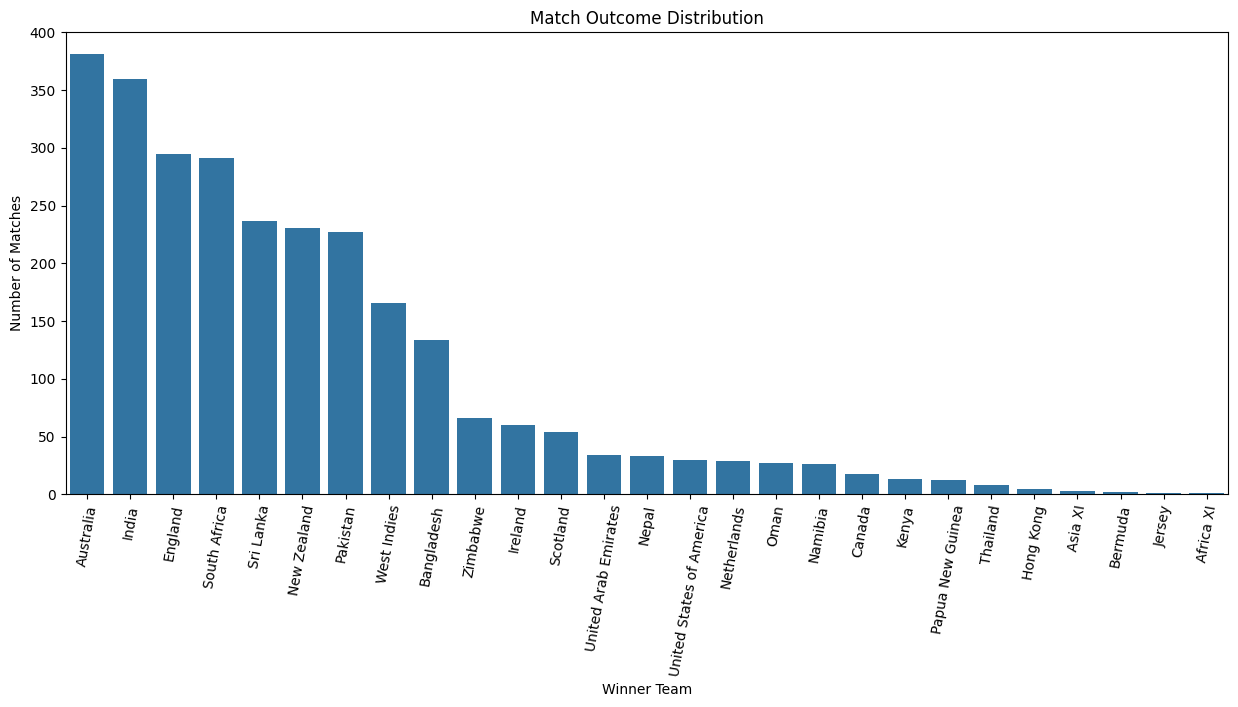

In [19]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='outcome_winner', order=df['outcome_winner'].value_counts().index)
plt.title('Match Outcome Distribution')
plt.ylabel('Number of Matches')
plt.xlabel('Winner Team')
plt.xticks(rotation=80)
plt.show()

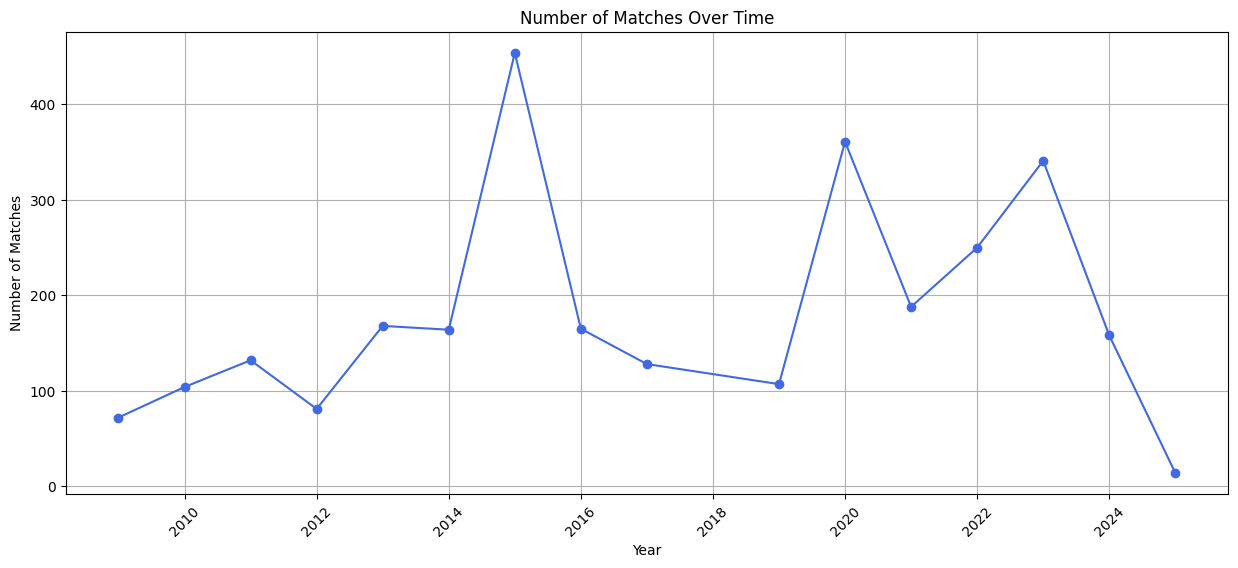

In [20]:
df['created'] = pd.to_datetime(df['created'])

# Match count over time (by year)
plt.figure(figsize=(15, 6))
df.groupby(df['created'].dt.year)['match_id'].count().plot(kind='line', color='royalblue', marker='o')
plt.title('Number of Matches Over Time')
plt.ylabel('Number of Matches')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

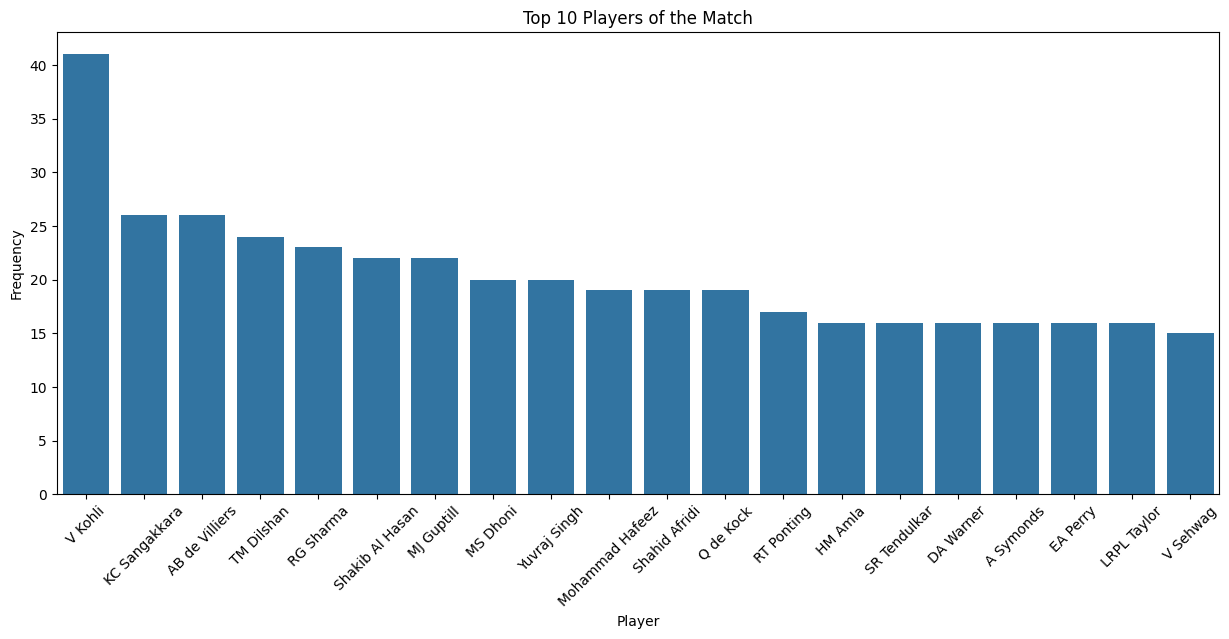

In [21]:
# Player of the match distribution
plt.figure(figsize=(15, 6))
top_players = df['player_of_match'].value_counts().head(20)
sns.barplot(x=top_players.index, y=top_players.values)
plt.title('Top 10 Players of the Match')
plt.xlabel('Player')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

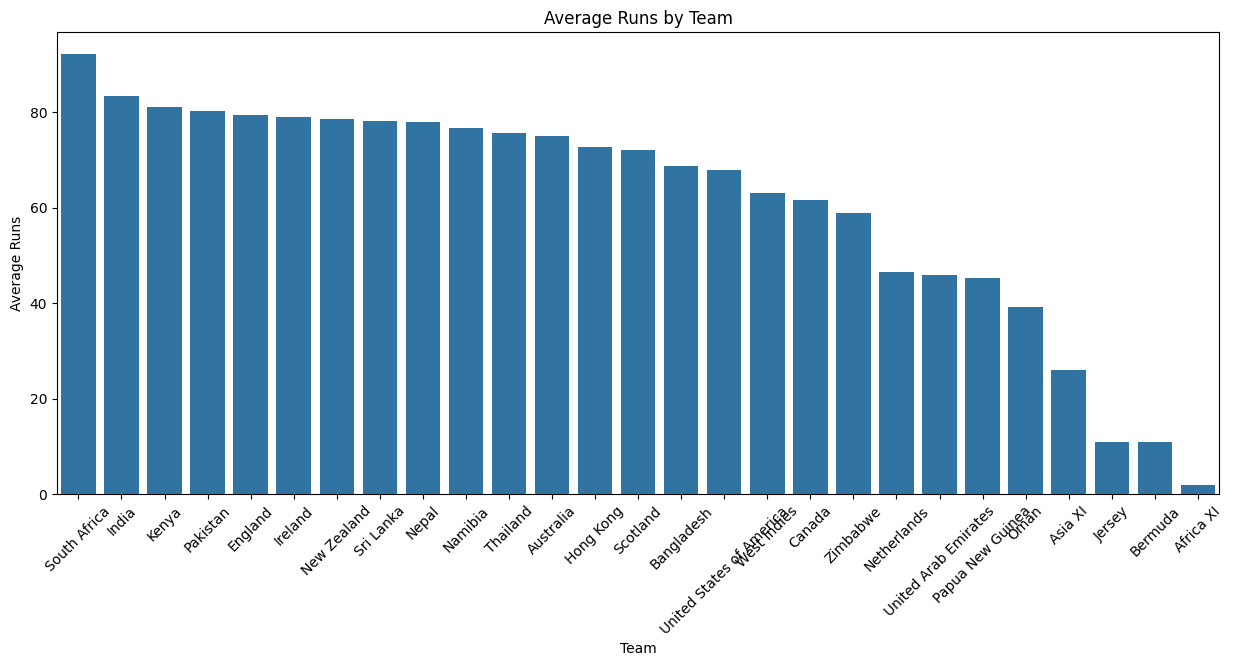

In [22]:
plt.figure(figsize=(15, 6))
team_avg_runs = df.groupby('outcome_winner')['outcome_by_runs'].mean().sort_values(ascending=False)
sns.barplot(x=team_avg_runs.index, y=team_avg_runs.values)
plt.title('Average Runs by Team')
plt.xlabel('Team')
plt.ylabel('Average Runs')
plt.xticks(rotation=45)
plt.show()

In [23]:
teams = df['teams'].str.split(', ', expand=True).stack().unique()
team_stats = {team: {'matches_played': 0, 'tosses_won': 0, 'matches_won': 0} for team in teams}

In [24]:
for index, row in df.iterrows():
    teams_in_match = row['teams'].split(', ')
    for team in teams_in_match:
        team_stats[team]['matches_played'] += 1
        
        if row['toss_winner'] == team:
            team_stats[team]['tosses_won'] += 1
        
        if row['outcome_winner'] == team:
            team_stats[team]['matches_won'] += 1

In [25]:
matches_df = pd.DataFrame.from_dict(team_stats, orient='index')
matches_df.reset_index(inplace=True)
matches_df.rename(columns={'index': 'team'}, inplace=True)

In [26]:
matches_df = matches_df[['team', 'matches_played', 'tosses_won', 'matches_won']]

matches_df['win_percentage'] = (matches_df['matches_won'] / matches_df['matches_played']) * 100
matches_df['toss_win_percentage'] = (matches_df['tosses_won'] / matches_df['matches_played']) * 100
matches_df['losses'] = matches_df['matches_played'] - matches_df['matches_won']
matches_df['draws'] = df[df['outcome_winner'].isna()]['teams'].apply(lambda x: [team for team in x.split(', ') if team in matches_df['team'].values]).apply(len).sum()  # Adjust this logic as necessary
matches_df['win_to_toss_ratio'] = matches_df['matches_won'] / matches_df['tosses_won'].replace(0, np.nan)

matches_df = matches_df.sort_values(by='win_percentage', ascending=False)

matches_df.head(10)

,team,matches_played,tosses_won,matches_won,win_percentage,toss_win_percentage,losses,draws,win_to_toss_ratio
21,Thailand,9,3,8,88.888889,33.333333,1,286,2.666667
3,Australia,569,294,381,66.959578,51.669596,188,286,1.295918
25,Asia XI,5,4,3,60.000000,80.000000,2,286,0.750000
0,India,610,294,360,59.016393,48.196721,250,286,1.224490
1,South Africa,498,251,291,58.433735,50.401606,207,286,1.159363
14,England,548,280,295,53.832117,51.094891,253,286,1.053571
19,Scotland,108,50,54,50.000000,46.296296,54,286,1.080000
20,Oman,55,29,27,49.090909,52.727273,28,286,0.931034
2,New Zealand,471,233,231,49.044586,49.469214,240,286,0.991416
4,Nepal,68,38,33,48.529412,55.882353,35,286,0.868421


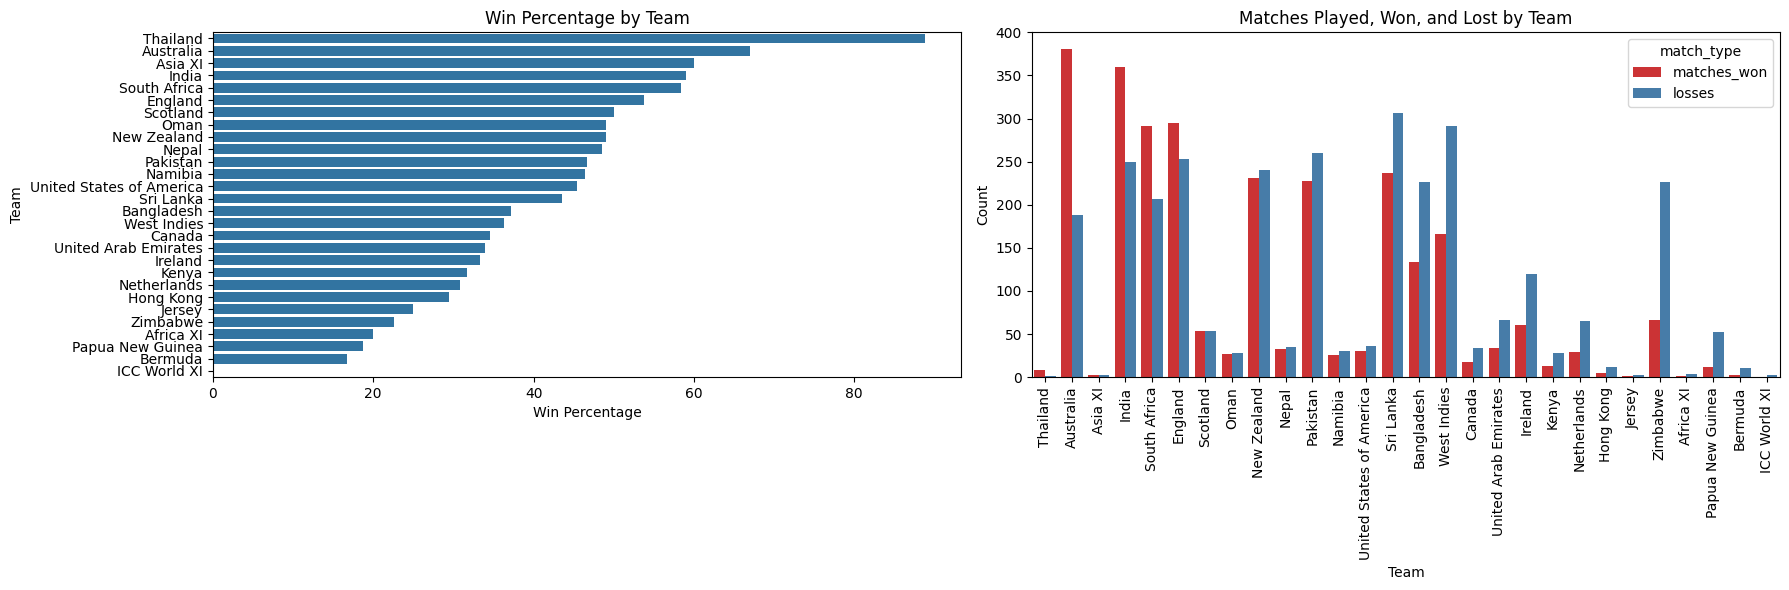

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(data=matches_df, y='team', x='win_percentage', ax=axes[0])
axes[0].set_title('Win Percentage by Team')
axes[0].set_xlabel('Win Percentage')
axes[0].set_ylabel('Team')

df_melted = matches_df.melt(id_vars='team', value_vars=['matches_won', 'losses'], var_name='match_type', value_name='count')
sns.barplot(data=df_melted, x='team', y='count', hue='match_type', palette='Set1', ax=axes[1])
axes[1].set_title('Matches Played, Won, and Lost by Team')
axes[1].set_xlabel('Team')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

# Player analysis

In [28]:
batter_df = pd.read_csv(os.path.join(output_folder, 'batter_player_stats.csv'))
bowler_df = pd.read_csv(os.path.join(output_folder, 'bowler_player_stats.csv'))

In [29]:
batter_df.head()

,player_name,role,total_runs,strike_rate,total_balls_faced,total_wickets_taken,total_runs_conceded,total_overs_bowled,total_matches_played,matches_played_as_batter,matches_played_as_bowler,matches_won,matches_lost,player_of_match_awards,team,average
0,RD Gaikwad,Batter,115,72.327044,159,0,0,0,580,580,0,360,220,0,India,NaN
1,Tilak Varma,Batter,68,54.400000,125,0,39,42,580,580,0,360,220,0,India,NaN
2,B Sai Sudharsan,Batter,127,88.194444,144,0,8,4,580,580,0,360,220,0,India,NaN
3,KL Rahul,Batter,2761,86.362215,3197,0,0,0,580,580,0,360,220,4,India,NaN
4,SV Samson,Batter,510,96.774194,527,0,0,0,580,580,0,360,220,2,India,NaN


In [30]:
bowler_df.head()

,player_name,role,total_runs,strike_rate,total_balls_faced,total_wickets_taken,total_runs_conceded,total_overs_bowled,total_matches_played,matches_played_as_batter,matches_played_as_bowler,matches_won,matches_lost,player_of_match_awards,team,economy_rate,average
0,N Burger,Bowler,8,20.000000,40,5,131,155,580,0,580,360,220,0,India,0.845161,26.200000
1,LB Williams,Bowler,17,73.913043,23,16,369,389,580,0,580,360,220,0,India,0.948586,23.062500
2,BE Hendricks,Bowler,24,53.333333,45,11,322,372,580,0,580,360,220,0,India,0.865591,29.272727
3,PWA Mulder,Bowler,136,85.000000,160,14,479,521,580,0,580,360,220,0,India,0.919386,34.214286
4,KA Maharaj,Bowler,238,80.134680,297,53,1673,2177,580,0,580,360,220,0,India,0.768489,31.566038


## Batters analysis

In [31]:
sns.set_style('whitegrid')

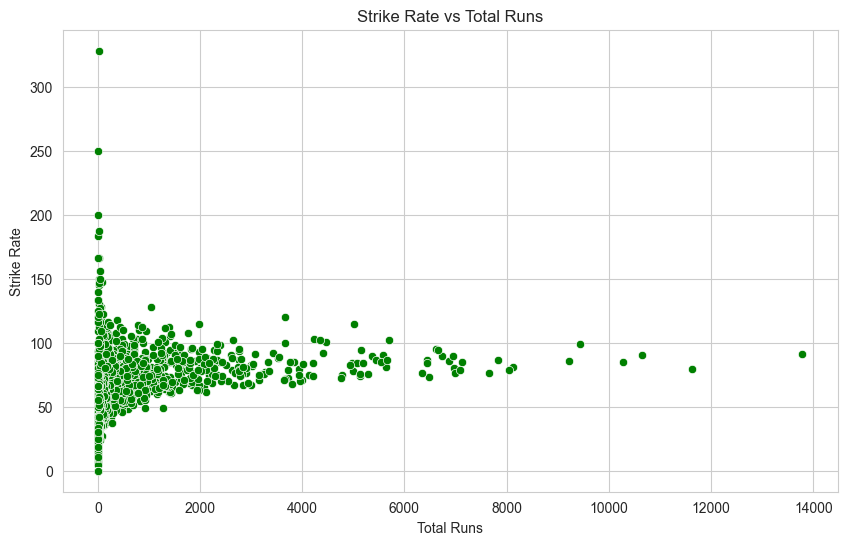

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_runs', y='strike_rate', data=batter_df, color='green')
plt.title('Strike Rate vs Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Strike Rate')
plt.show()

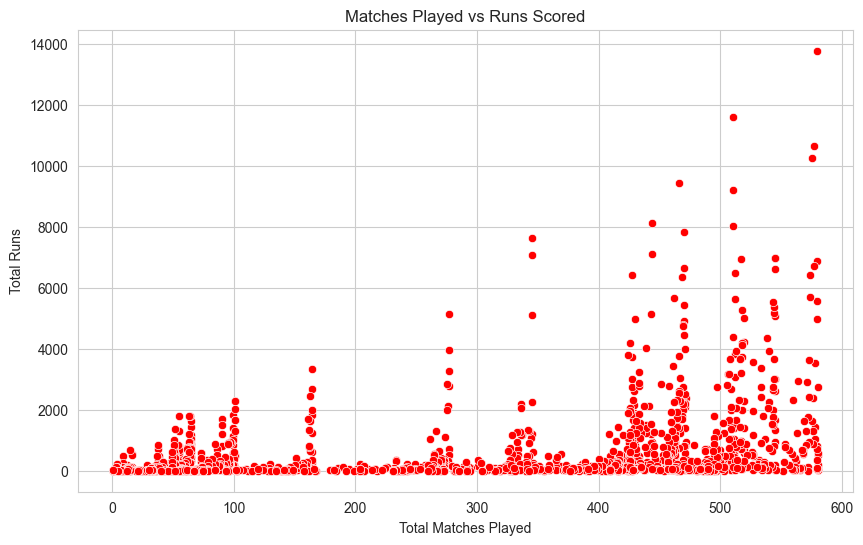

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_matches_played', y='total_runs', data=batter_df, color='red')
plt.title('Matches Played vs Runs Scored')
plt.xlabel('Total Matches Played')
plt.ylabel('Total Runs')
plt.show()

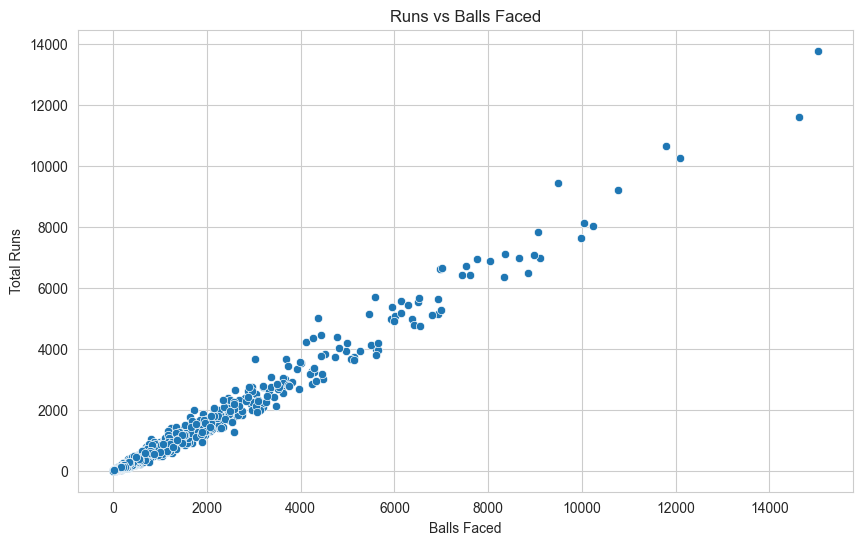

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_balls_faced', y='total_runs', data=batter_df)
plt.title('Runs vs Balls Faced')
plt.xlabel('Balls Faced')
plt.ylabel('Total Runs')
plt.show()

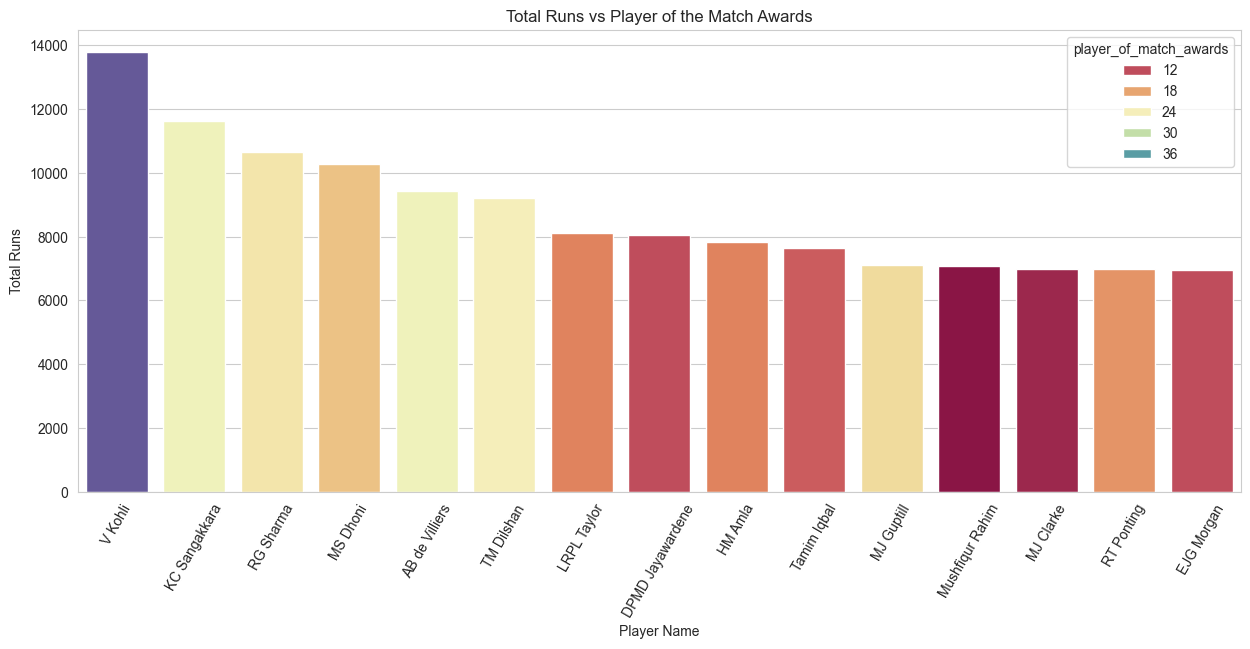

In [35]:
plt.figure(figsize=(15, 6))
sns.barplot(x='player_name', y='total_runs', data=batter_df.sort_values(by='total_runs', ascending=False).head(15), hue='player_of_match_awards', palette='Spectral')
plt.title('Total Runs vs Player of the Match Awards')
plt.xlabel('Player Name')
plt.ylabel('Total Runs')
plt.xticks(rotation=60)
plt.show()

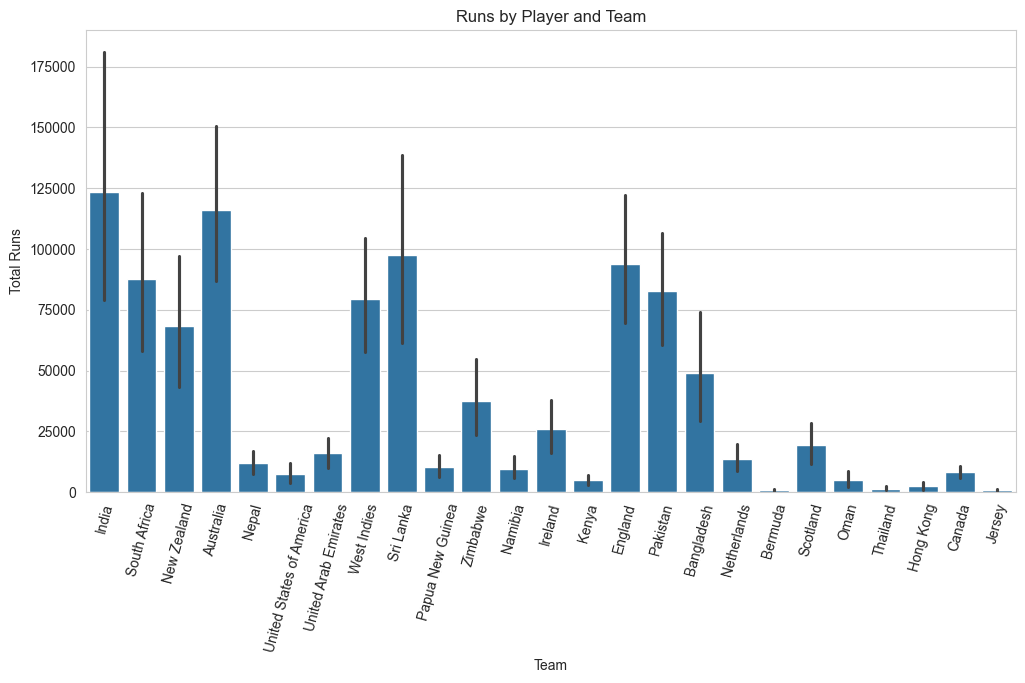

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(x='team', y='total_runs', data=batter_df, estimator='sum')
plt.title('Runs by Player and Team')
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.xticks(rotation=75)
plt.show()

# Maths analysis

In [37]:
df.sort_values(by='outcome_by_runs', ascending=False).head()

,match_id,created,city,dates,event_name,match_number,gender,match_type,match_type_number,toss_winner,...,outcome_winner,outcome_by_runs,outcome_by_wickets,overs,player_of_match,season,teams,venue,total_fours,total_sixes
1216,1348645,2023-01-17,Thiruvananthapuram,2023-01-15,Sri Lanka tour of India,3.0,male,ODI,4505,India,...,India,317.0,NaN,50,V Kohli,2022/23,"India, Sri Lanka","Greenfield International Stadium, Thiruvananth...",43,14
1890,1384415,2023-10-26,Delhi,2023-10-25,ICC Cricket World Cup,24.0,male,ODI,4681,Australia,...,Australia,309.0,NaN,50,GJ Maxwell,2023/24,"Australia, Netherlands","Arun Jaitley Stadium, Delhi",55,15
2264,1145892,2020-07-16,Dublin,2018-06-10,New Zealand Women tour of Ireland and England,2.0,female,ODI,1117,New Zealand,...,New Zealand,306.0,NaN,50,NaN,2018,"New Zealand, Ireland",The Vineyard,62,9
1539,1377762,2023-06-26,Harare,2023-06-26,ICC Cricket World Cup Qualifier,17.0,male,ODI,4601,United States of America,...,Zimbabwe,304.0,NaN,50,SC Williams,2023,"Zimbabwe, United States of America",Harare Sports Club,47,15
2134,1459899,2025-01-15,Rajkot,2025-01-15,Ireland Women tour of India,3.0,female,ODI,1434,India,...,India,304.0,NaN,50,Pratika Rawal,2024/25,"India, Ireland","Saurashtra Cricket Association Stadium, Rajkot",64,9


In [38]:
ids = list(df.sort_values(by='outcome_by_runs', ascending=False).head(5)["match_id"])
ids

[1348645, 1384415, 1145892, 1377762, 1459899]

In [39]:
def plot_match_runs_and_wickets(match_id):
    """
    Plots a line chart of cumulative runs scored by both teams in a match and marks wickets with red dots.

    Parameters:
    - match_id (str or int): The ID of the match to plot.
    - csv_folder (str): The folder where the CSV files are stored.
    """
    csv_file_path = os.path.join(csv_folder, f"{match_id}.csv")
    
    if not os.path.exists(csv_file_path):
        print(f"Error: CSV file for match ID {match_id} not found in the folder {csv_folder}.")
        return
    
    df = pd.read_csv(csv_file_path)
    
    teams = df['team'].unique()
    
    plt.figure(figsize=(18, 6))
    ax = plt.gca()
    
    for team in teams:
        team_df = df[df['team'] == team].copy()
        team_df['cumulative_runs'] = team_df['runs_total'].cumsum()
        ax.plot(team_df.index, team_df['cumulative_runs'], label=f'{team} Cumulative Runs')
        
        # Mark wickets with red dots
        wickets = team_df[pd.notna(team_df['wicket_kind'])]
        ax.scatter(wickets.index, wickets['cumulative_runs'], color='red', label='Wicket' if team == teams[0] else "")
    
    ax.set_xlabel('Ball Number')
    ax.set_ylabel('Cumulative Runs')
    ax.set_title(f'Match ID {match_id}: Runs Scored and Wickets')
    
    ax.legend(loc='upper left')
    plt.show()

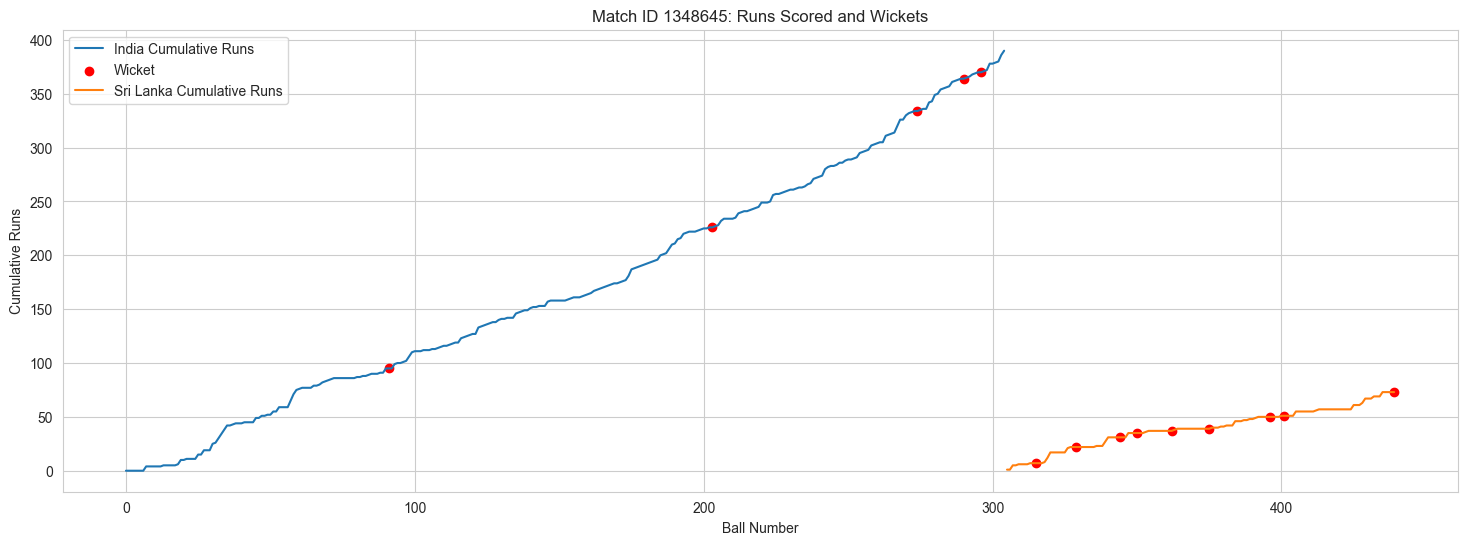

In [40]:
plot_match_runs_and_wickets(ids[0])

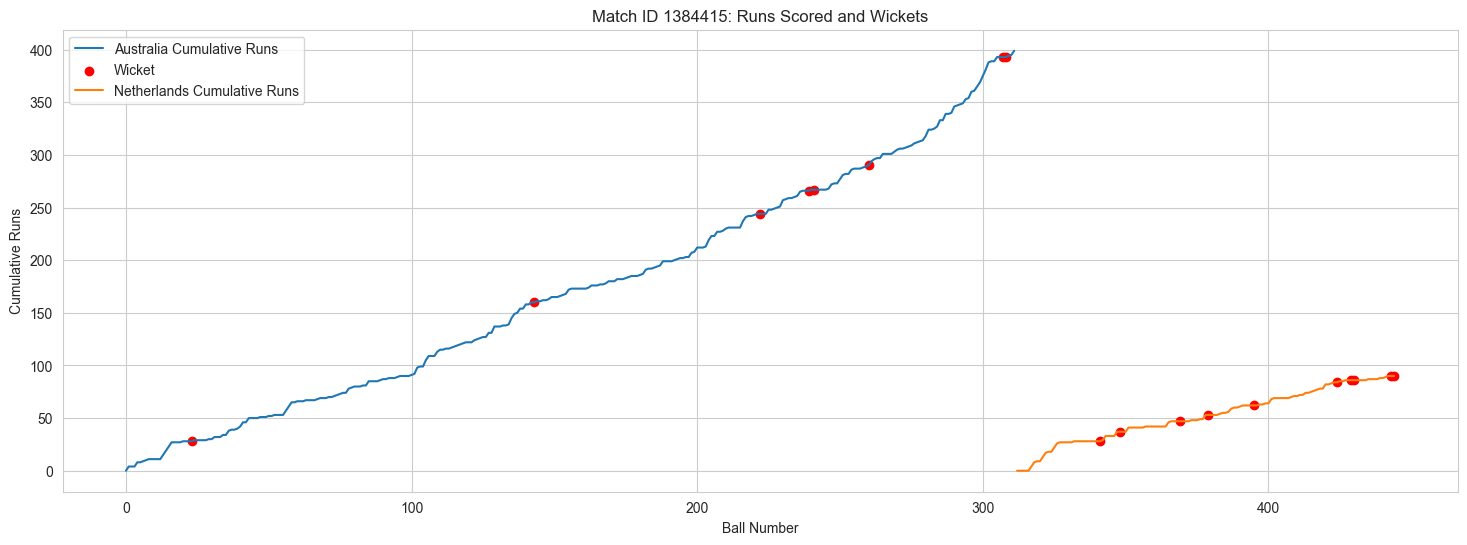

In [41]:
plot_match_runs_and_wickets(ids[1])

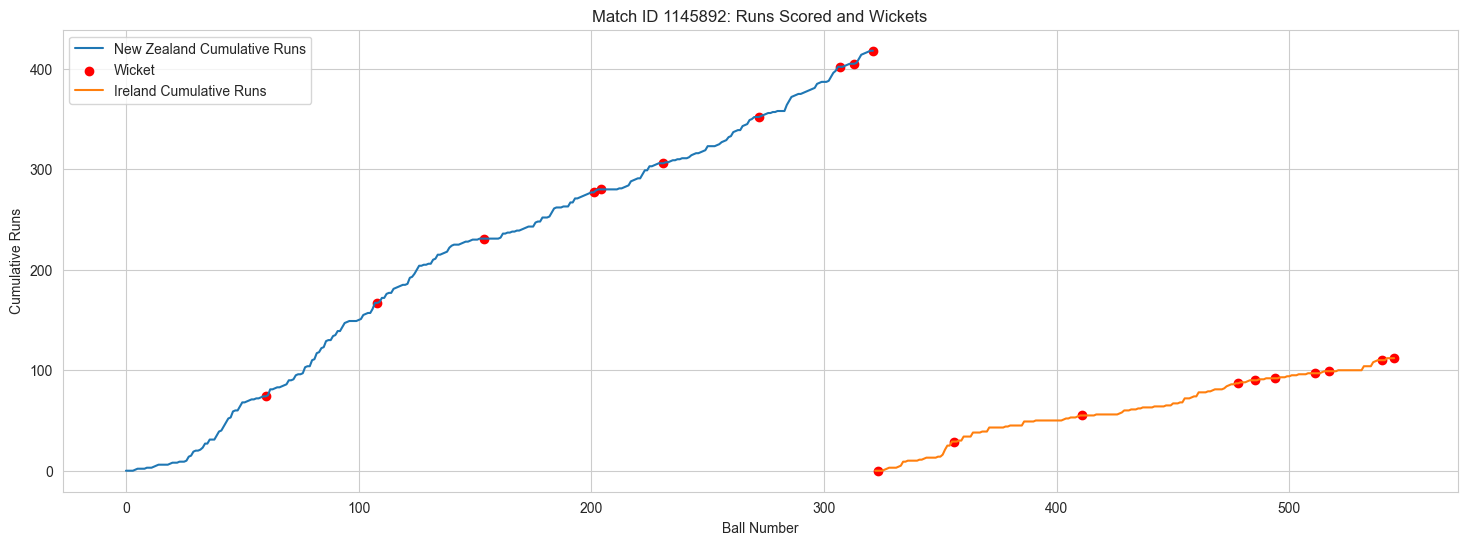

In [42]:
plot_match_runs_and_wickets(ids[2])

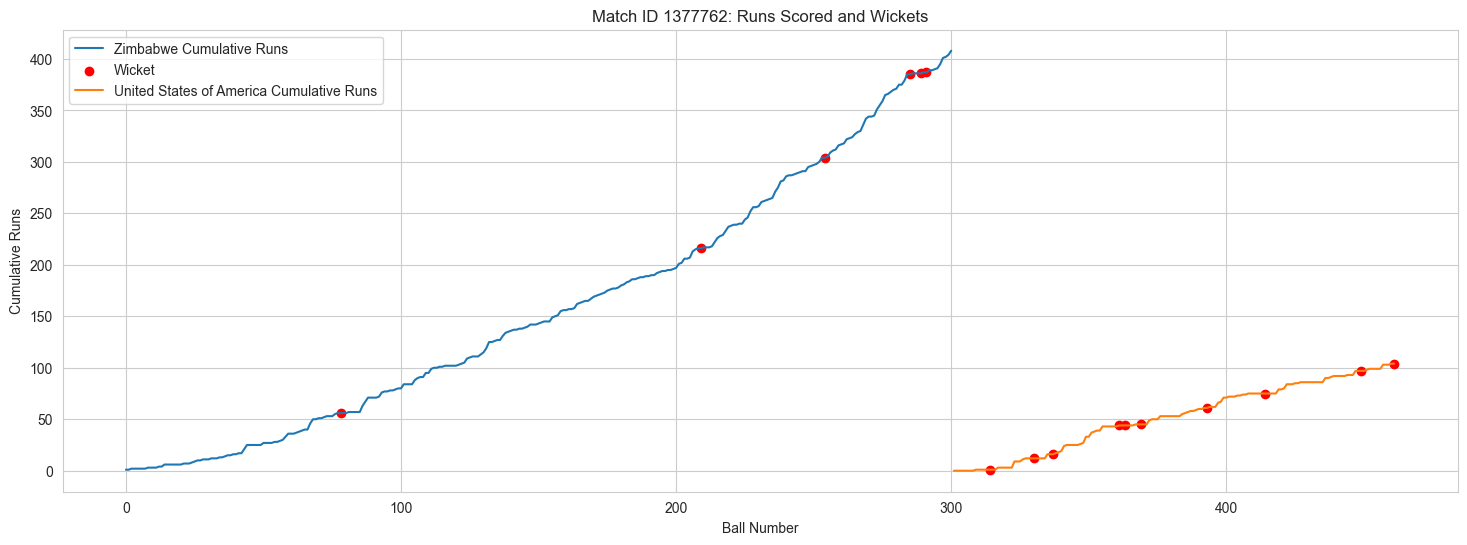

In [43]:
plot_match_runs_and_wickets(ids[3])

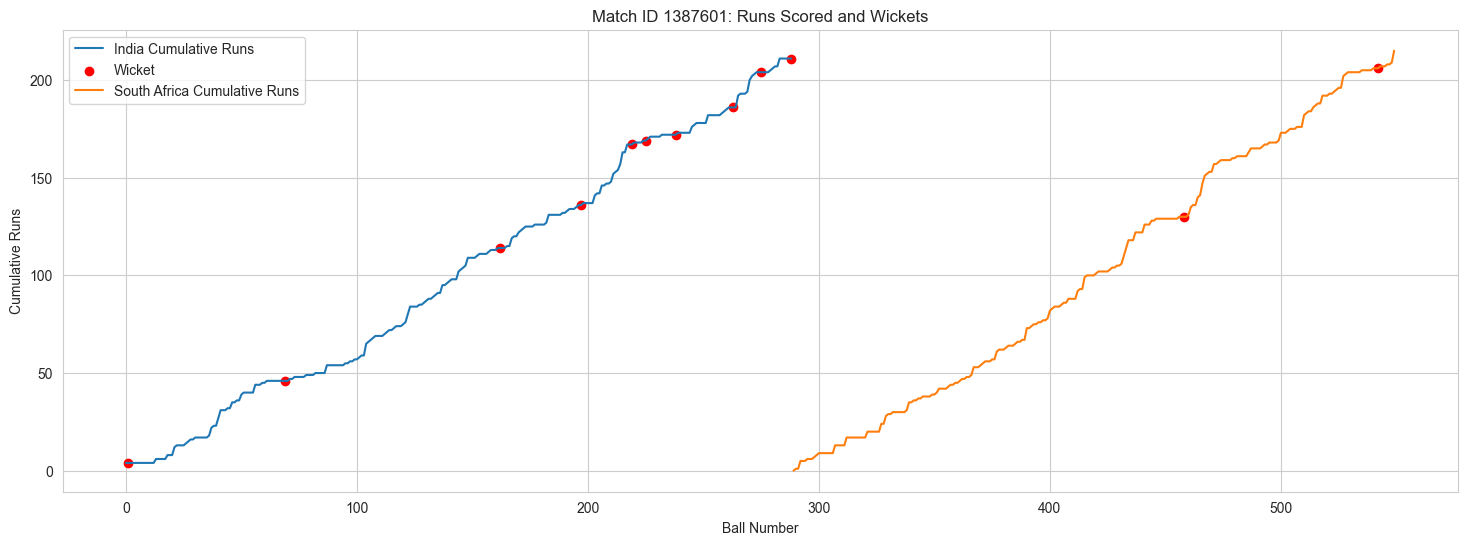

In [44]:
plot_match_runs_and_wickets(1387601)

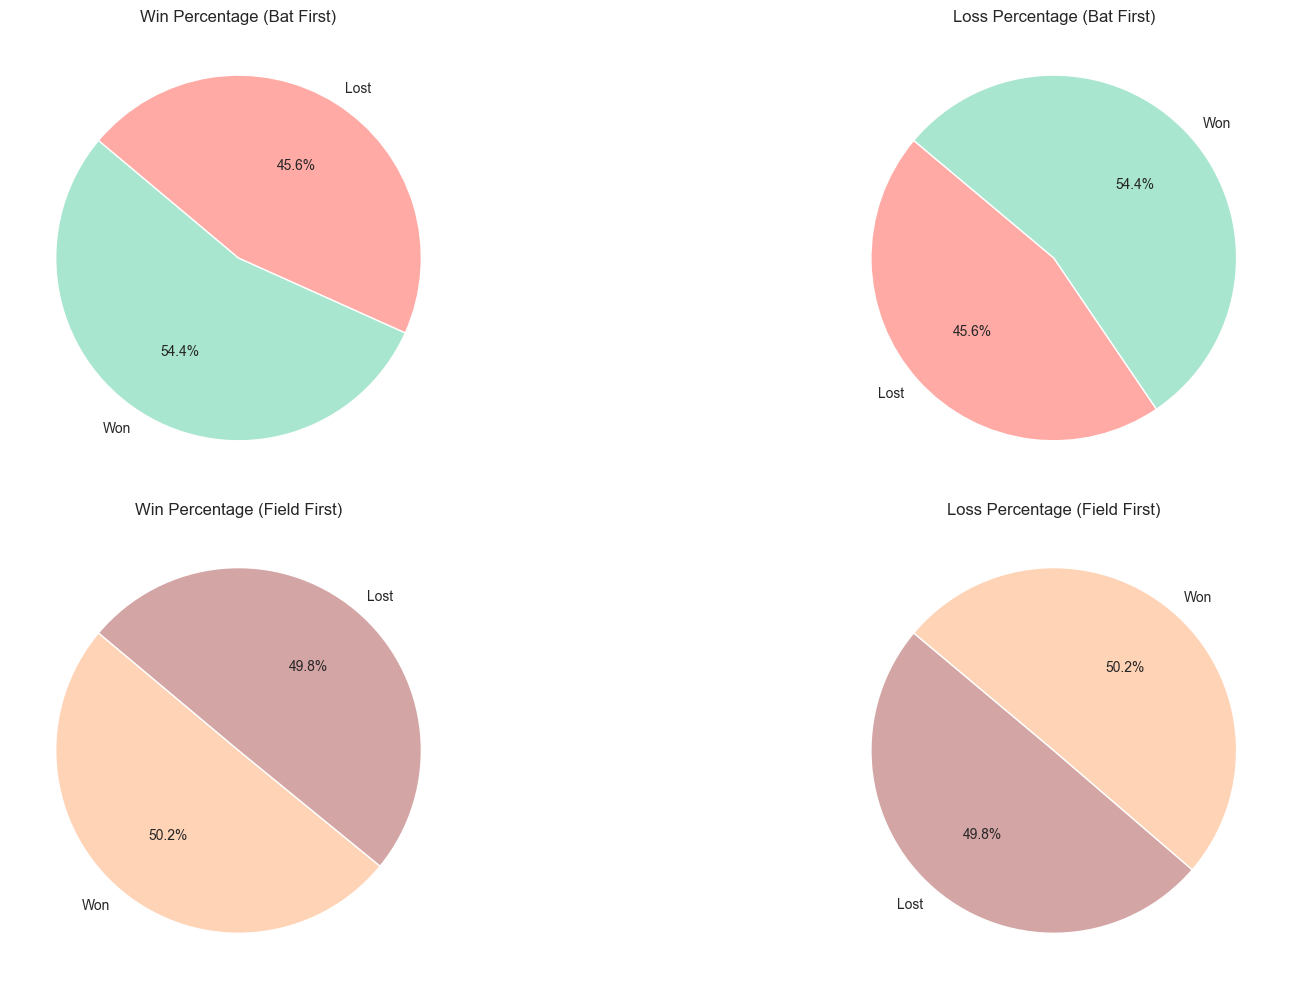

In [45]:
df['toss_winner_won'] = df['toss_winner'] == df['outcome_winner']

batting_stats = df[df['toss_decision'] == 'bat']['toss_winner_won'].value_counts(normalize=True) * 100
fielding_stats = df[df['toss_decision'] == 'field']['toss_winner_won'].value_counts(normalize=True) * 100

labels = ['Won', 'Lost']

bat_colors = ['#A8E6CF', '#FFAAA5']  # Light green & soft red
field_colors = ['#FFD3B6', '#D4A5A5']  # Soft peach & muted red

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

axes[0, 0].pie(batting_stats, labels=labels, autopct='%1.1f%%', colors=bat_colors, startangle=140)
axes[0, 0].set_title("Win Percentage (Bat First)")

axes[0, 1].pie(batting_stats[::-1], labels=labels[::-1], autopct='%1.1f%%', colors=bat_colors[::-1], startangle=140)
axes[0, 1].set_title("Loss Percentage (Bat First)")

axes[1, 0].pie(fielding_stats, labels=labels, autopct='%1.1f%%', colors=field_colors, startangle=140)
axes[1, 0].set_title("Win Percentage (Field First)")

axes[1, 1].pie(fielding_stats[::-1], labels=labels[::-1], autopct='%1.1f%%', colors=field_colors[::-1], startangle=140)
axes[1, 1].set_title("Loss Percentage (Field First)")

plt.tight_layout()
plt.show()

# Player data analysis

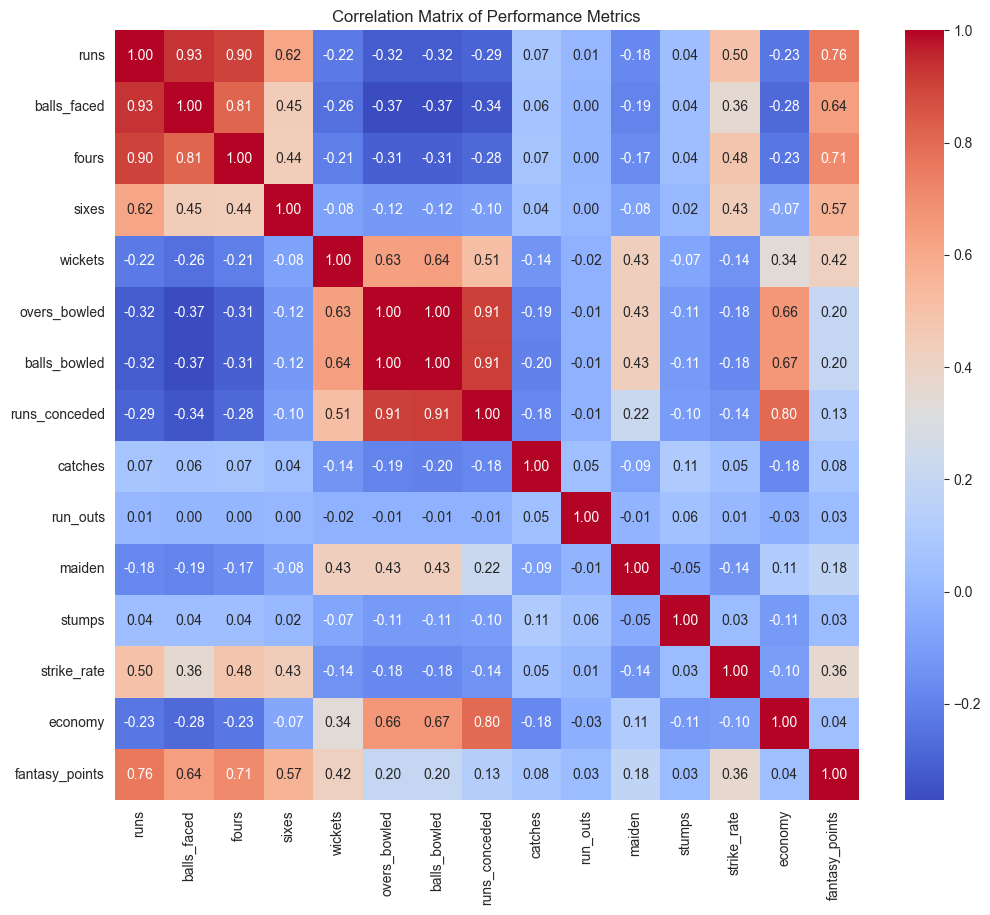

In [46]:
columns_of_interest = ["runs", "balls_faced", "fours", "sixes", "wickets", "overs_bowled",
                       "balls_bowled", "runs_conceded", "catches", "run_outs", "maiden",
                       "stumps", "strike_rate", "economy", "fantasy_points"]

corr_matrix = players_detailed_stats[columns_of_interest].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Performance Metrics")
plt.show()